# KNN - K Nearest Neighbours Algorithm

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

# Data Preparation

In [64]:
from sklearn import datasets


wine_data = datasets.load_wine()

X = pd.DataFrame(wine_data.data, columns = wine_data.feature_names)
y = pd.DataFrame(wine_data.target, columns = ['target'])

In [65]:
X.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


In [66]:
y.head(3)

,target
0,0
1,0
2,0


## Visualization

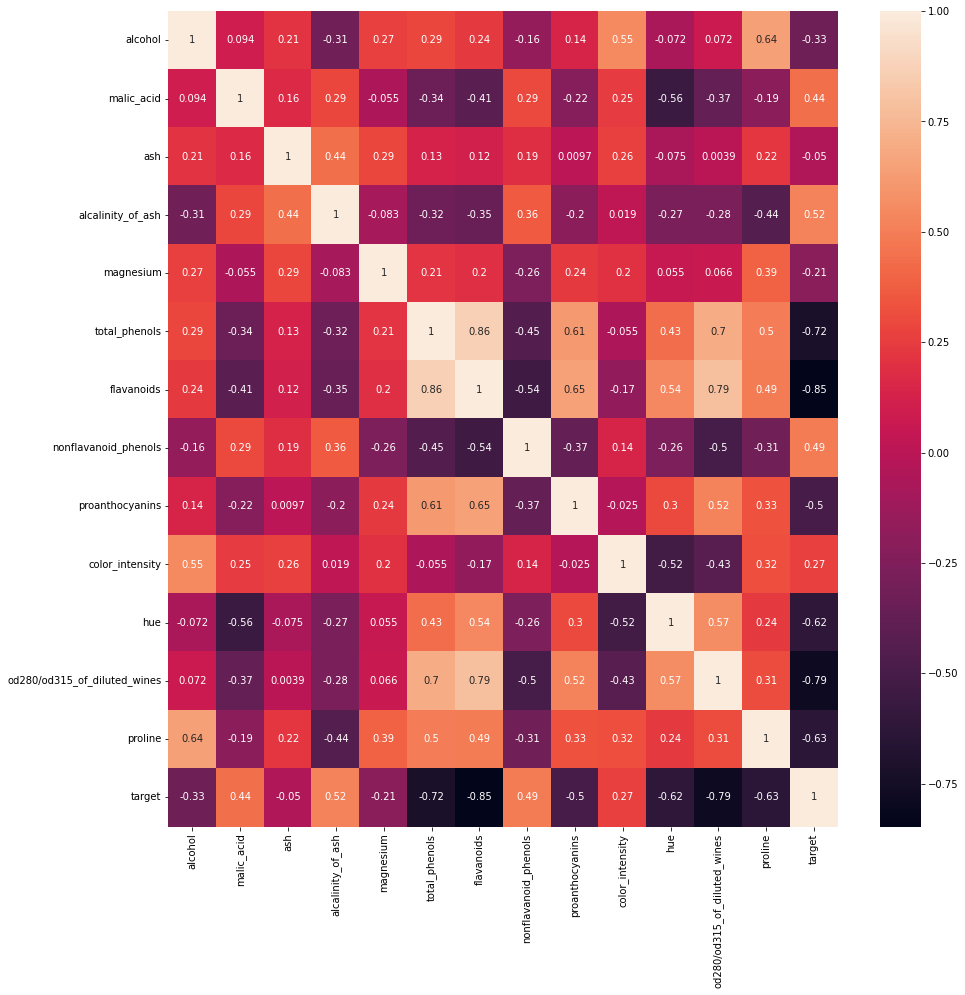

In [72]:
plt.figure(figsize=(15,15))
sns.heatmap((pd.concat([X,y], axis = 1).corr()), annot = True)
plt.show()

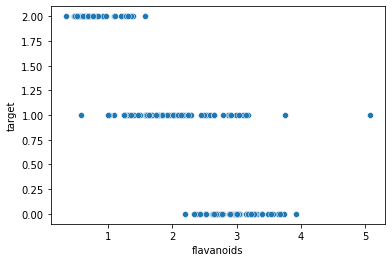

In [73]:
# scatter

sns.scatterplot(x=X.flavanoids, y=y.target)
plt.show()

### Standard Scaling

In [9]:
ss = StandardScaler()
X_new = ss.fit_transform(X)

# Train-Test-Split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state = 42, test_size = 0.3)

# Modelling

In [60]:
knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

# Prediction

In [61]:
y_pred = knn_model.predict(X_test)
y_pred

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2])

# Evaluation

In [62]:
# classification report

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



## Finding the optimal Value of K

In [53]:
train_error = []
test_error = []
for i in range(1,15):

    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    y_pred_train = knn_model.predict(X_train)
    y_pred_test = knn_model.predict(X_test)
    train_error.append(np.mean(np.array(y_pred_train) != np.array(y_train)))
    test_error.append(np.mean(np.array(y_pred_test) != np.array(y_test)))

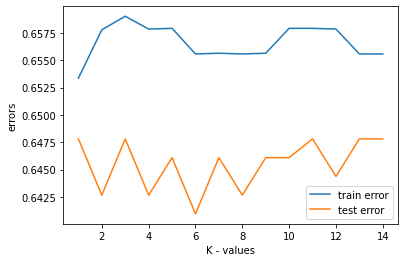

In [54]:
# visualizing the train & test error

sns.lineplot(x = np.arange(1,15),y = train_error, label = 'train error')
sns.lineplot(x = np.arange(1,15),y = test_error, label = 'test error')
plt.legend()
plt.xlabel('K - values')
plt.ylabel('errors')

plt.show()

## Optimal Value of K is 8 as the train and test error is less at this point.